## Cluster Analysis
Is a subset of unsupervised learning methods

### Introduction to Unsupervised Learning
* Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
* Model tries to find relationship between data.
* Most common unsupervised learning method is clustering which is used for exploratory data analysis to find hidden patterns or grouping in data

### Clustering
* A learning technique to group a set of objects in such a way that objects of same group are more similar to each other than from objects of other group.
* Applications of clustering are as follows
  - Automatically organizing the data
  - Labeling data
  - Understanding hidden structure of data
  - News Cloustering for grouping similar news together
  - Customer Segmentation
  - Suggest social groups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

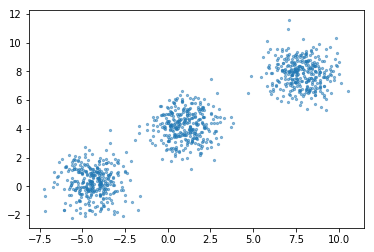

In [6]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

### Distance or Similarity Function
* Data belonging to same cluster are similar & data belonging to different cluster are different. 
* We need mechanisms to measure similarity & differences between data. 
* This can be achieved using any of the below techniques.

In [7]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [8]:
X = [[0, 1], [1, 1]]
# X = np.random.normal(0,1,(100,2))

In [9]:
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [10]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [11]:
cosine_distances(X,X)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [12]:
manhattan_distances(X,X)

array([[0., 1.],
       [1., 0.]])

### 4. Clustering as an Optimization Problem
* Maximize inter-cluster distances
* Minimize intra-cluster distances

###  Partitioning Method
#### KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/kmeans2.png?raw=true">

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif)

In [13]:
from sklearn.datasets import make_blobs, make_moons

In [14]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=.5)

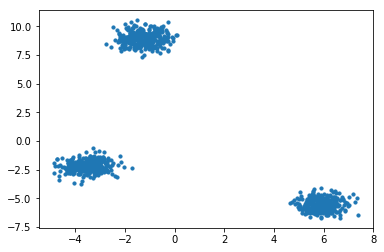

In [15]:
plt.scatter(X[:,0], X[:,1],s=10)

In [18]:
from sklearn.cluster import KMeans, MeanShift

In [28]:
kmeans = KMeans(n_clusters=3)

In [29]:
kmeans.fit(X)

KMeans(n_clusters=3)

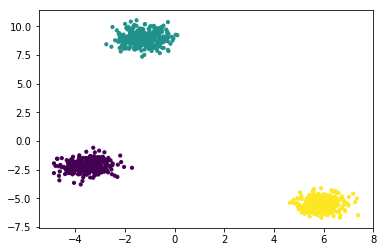

In [30]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

In [31]:
X, y = make_moons(n_samples=1000, noise=.09)

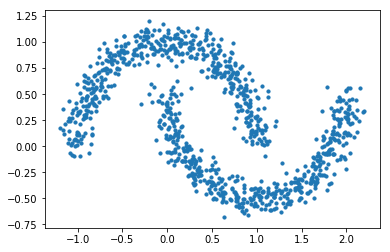

In [32]:
plt.scatter(X[:,0], X[:,1],s=10)

In [33]:
kmeans = KMeans(n_clusters=2)

In [34]:
kmeans.fit(X)

KMeans(n_clusters=2)

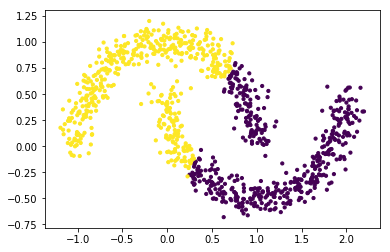

In [35]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

In [36]:
kmeans = KMeans(n_clusters=4)

In [37]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

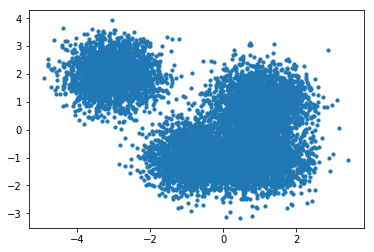

In [38]:
plt.scatter(X[:,0], X[:,1],s=10)

In [39]:
kmeans = KMeans(n_clusters=4)

### Mean shift

In [40]:
ms = MeanShift()

In [41]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [42]:
ms.fit(X)

MeanShift()

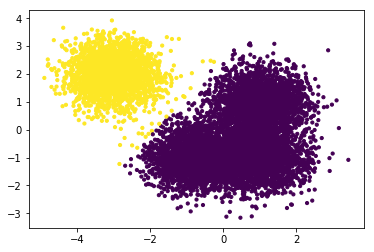

In [43]:
plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))

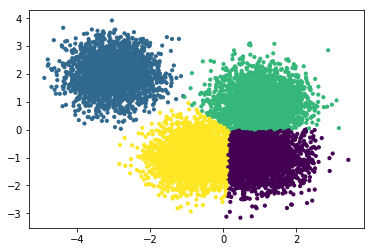

In [44]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

### More complex data

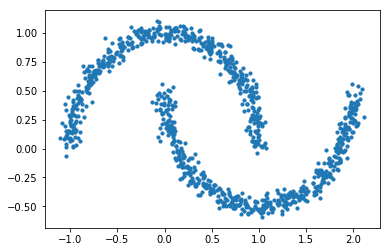

In [30]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

### Agglomerative Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
agc = AgglomerativeClustering(linkage='single')

In [33]:
agc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2,
            pooling_func='deprecated')

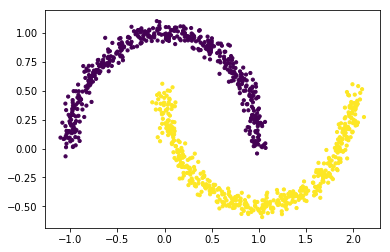

In [34]:
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

### DBSCAN

In [35]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

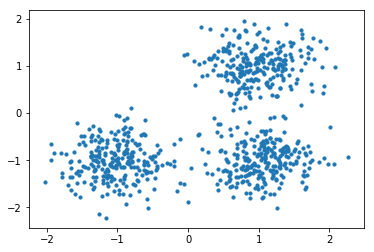

In [36]:
plt.scatter(X[:,0], X[:,1],s=10)

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

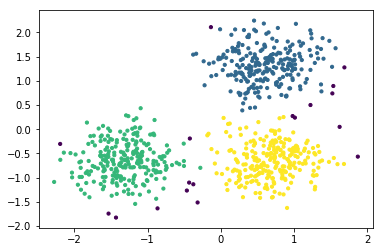

In [39]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)